In [1]:
import os
import csv

gt_train_folder_path = '/app/duy55/segmentation/cityscapes/Cityspaces/gtFine/train'
img_train_folder_path = '/app/duy55/segmentation/cityscapes/Cityspaces/images/train'

gt_val_folder_path = '/app/duy55/segmentation/cityscapes/Cityspaces/gtFine/val'
img_val_folder_path = '/app/duy55/segmentation/cityscapes/Cityspaces/images/val'

gt_train_file_paths = []
img_train_file_paths = []

gt_val_file_paths = []
img_val_file_paths = []


def get_file_paths(folder_path, file_paths_list):
    for root, _, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            file_paths_list.append(file_path)


get_file_paths(gt_train_folder_path, gt_train_file_paths)
get_file_paths(img_train_folder_path, img_train_file_paths)

gt_train_file_paths_sorted=sorted(gt_train_file_paths)
img_train_file_paths_sorted=sorted(img_train_file_paths)


get_file_paths(gt_val_folder_path, gt_val_file_paths)
get_file_paths(img_val_folder_path, img_val_file_paths)

gt_val_file_paths_sorted=sorted(gt_val_file_paths)
img_val_file_paths_sorted=sorted(img_val_file_paths)



# Write the file paths to CSV files
def write_csv(file_paths_list, csv_file_path):
    with open(csv_file_path, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(['images', 'masks'])
        i=0
        j=0
        for path in file_paths_list[0]:
            csv_writer.writerow([file_paths_list[0][i], file_paths_list[1][j+4]])
            i+=1
            j+=6

file_paths_list = []
file_paths_list.append(img_train_file_paths_sorted)
file_paths_list.append(gt_train_file_paths_sorted)

val_path_list = []
val_path_list.append(img_val_file_paths_sorted)
val_path_list.append(gt_val_file_paths_sorted)


#write ground truth training file paths to CSV
write_csv(file_paths_list, "/app/duy55/segmentation/annotation/train_sorted.csv")
write_csv(val_path_list, "/app/duy55/segmentation/annotation/val_sorted.csv")
print(f"Annotation file is created")

Annotation file is created


## EDA 

In [2]:
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt

In [3]:
train_path = "/app/duy55/segmentation/annotation/train_sorted.csv"
val_path = "/app/duy55/segmentation/annotation/val_sorted.csv"
train_df = pd.read_csv(train_path)
val_df = pd.read_csv(val_path)

In [16]:
print(len(train_df))
print(len(val_df))

2975
500


In [4]:
class MaskDistributionAnalyzer:
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)

    def analyze_mask_distribution(self):
        mask_paths = self.data['masks']
        class_counts = {}

        for mask_path in mask_paths:
#             Parse the mask file path and extract class information
            mask_info = mask_path.split('/')[-1]  # Assuming masks are in a folder structure
            class_name = mask_info.split('_')[0]  # Extract class name from file name
            class_counts[class_name] = class_counts.get(class_name, 0) + 1

        return class_counts

    def plot_pie_chart(self, class_counts):
        labels = class_counts.keys()
        sizes = class_counts.values()

        plt.figure(figsize=(8, 8))
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.axis('equal') 
        plt.title("Mask Class Distribution")
        plt.show()

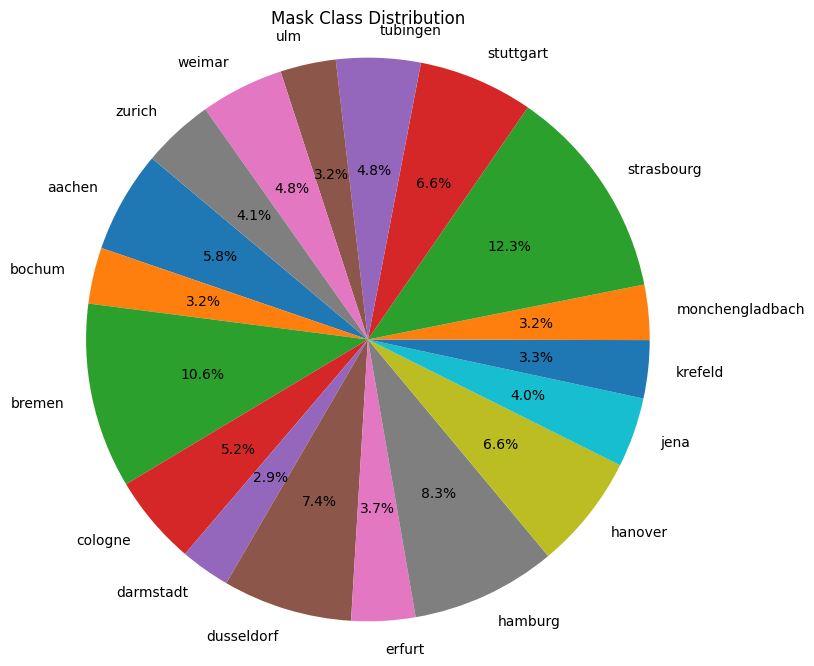

In [23]:
analyzer = MaskDistributionAnalyzer(train_path)
class_counts = analyzer.analyze_mask_distribution()
analyzer.plot_pie_chart(class_counts)

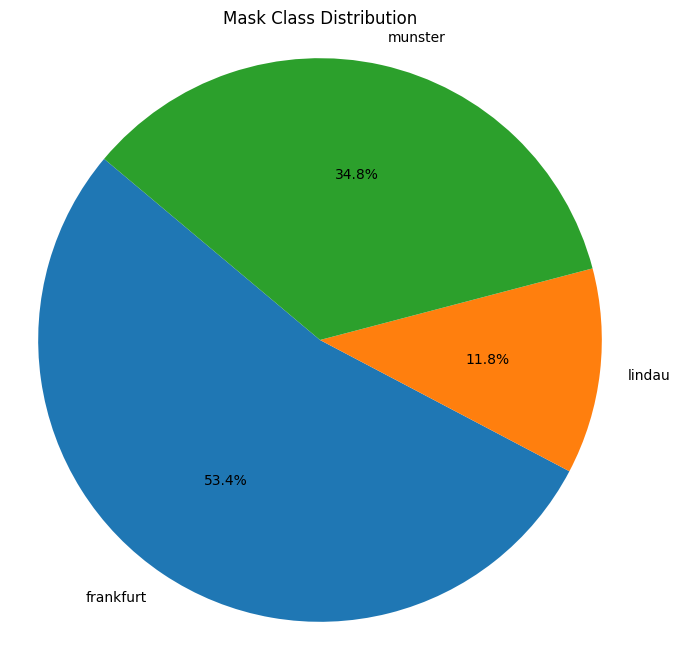

In [5]:
analyzer = MaskDistributionAnalyzer(val_path)
class_counts = analyzer.analyze_mask_distribution()
analyzer.plot_pie_chart(class_counts)

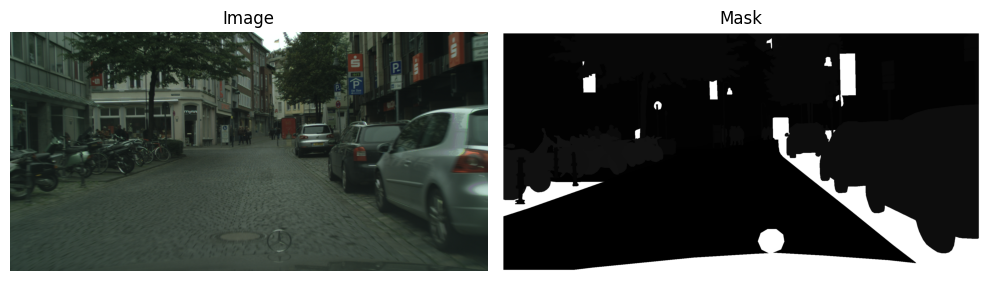

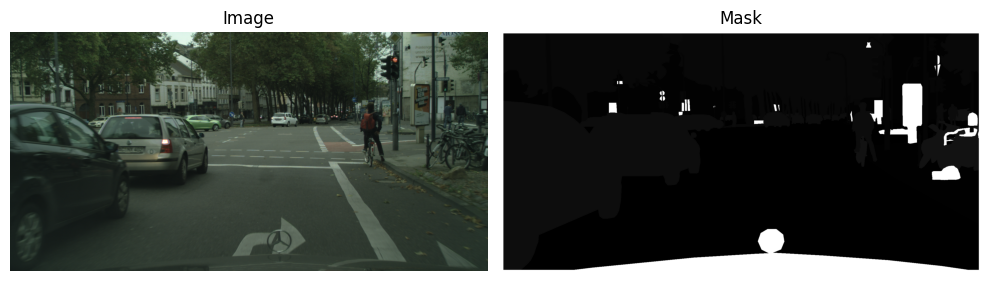

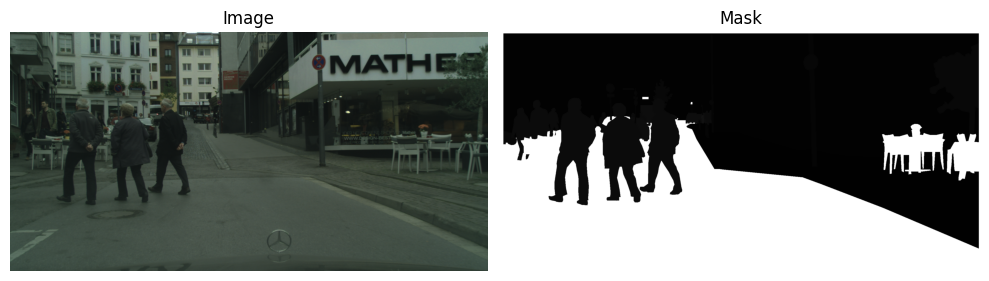

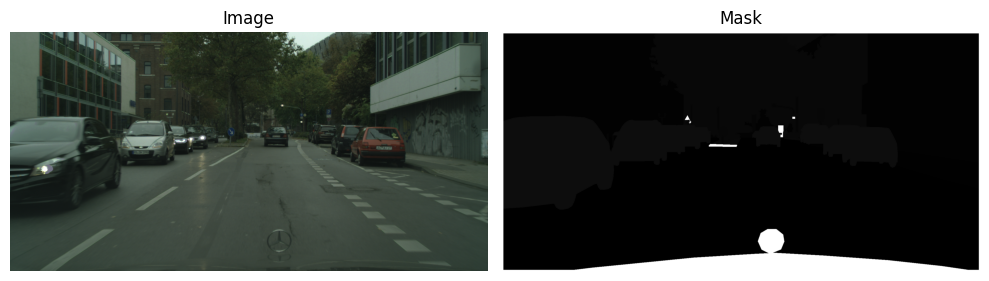

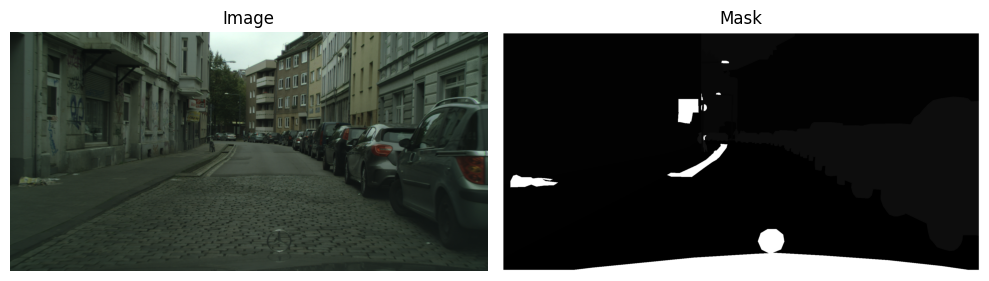

In [6]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt


# Let's choose a random sample of images to display
sample_indices = [89, 10, 20, 30, 40]

for idx in sample_indices:
    image_path = train_df.loc[idx, 'images']
    mask_path = train_df.loc[idx, 'masks']

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    mask = cv2.imread(mask_path)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(mask)
    plt.title('Mask')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

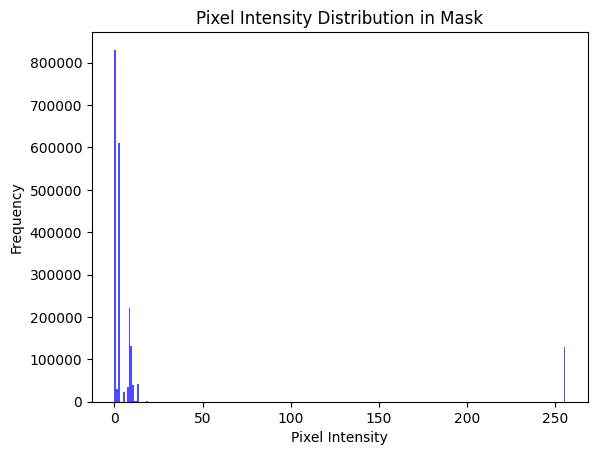

In [7]:
index_to_analyze = 0

# Load the mask
mask_path = train_df.loc[index_to_analyze, 'masks']
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

plt.hist(mask.flatten(), bins=256, range=(0, 256), color='b', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution in Mask')
plt.show()

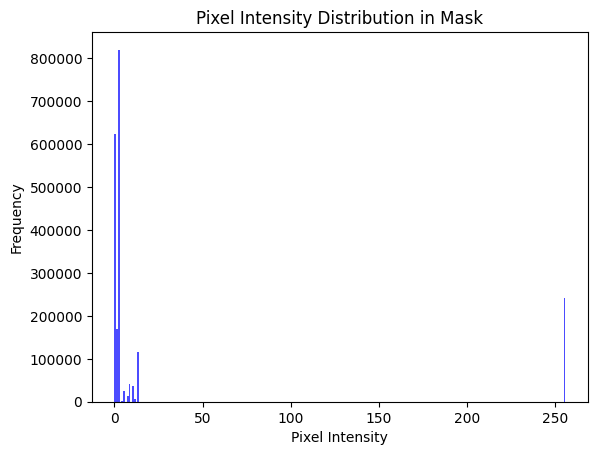

In [8]:
index_to_analyze = 0

# Load the mask
mask_path = val_df.loc[index_to_analyze, 'masks']
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

plt.hist(mask.flatten(), bins=256, range=(0, 256), color='b', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution in Mask')
plt.show()